#1. Importing Libreries

In [61]:
import pandas as pd #
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from google.colab import drive
drive.mount('/content/drive')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#2. Importing data


In [8]:
df= pd.read_csv('/content/drive/MyDrive/ML_Supervised_learning/housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [9]:
# checking the first 5 rows of the data
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
# cehcking the columns
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

#3. Data Cleaning and Preprocessing

##1. Handeling Missing Values

In [18]:
# check missing values

print(df.isnull().sum())

# drop all the rows that have missing values



# fill the missing values with mean
df['total_bedrooms']=df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

print(df)



longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
       longitude  latitude  ...  median_house_value  ocean_proximity
0        -122.23     37.88  ...            452600.0         NEAR BAY
1        -122.22     37.86  ...            358500.0         NEAR BAY
2        -122.24     37.85  ...            352100.0         NEAR BAY
3        -122.25     37.85  ...            341300.0         NEAR BAY
4        -122.25     37.85  ...            342200.0         NEAR BAY
...          ...       ...  ...                 ...              ...
20635    -121.09     39.48  ...             78100.0           INLAND
20636    -121.21     39.49  ...             77100.0           INLAND
20637    -121.22     39.43  ...             92300.0           INLAND
20638    -121.32     39.43  ...             84700.0      

##2. Removing duplicates

In [19]:
# remove the duplicates as this will bias the model

df.drop_duplicates()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


##3. Handeling Outliers

In [24]:
# we will handel the outliers as this will distort the linear regression
# using IQR
Q1= df['median_house_value'].quantile(0.25)
Q3= df['median_house_value'].quantile(0.75)

IQR = Q3-Q1
df=df[~((df['median_house_value'] < (Q1 - 1.5 * IQR)) | (df['median_house_value'] > (Q3 + 1.5 * IQR)))]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


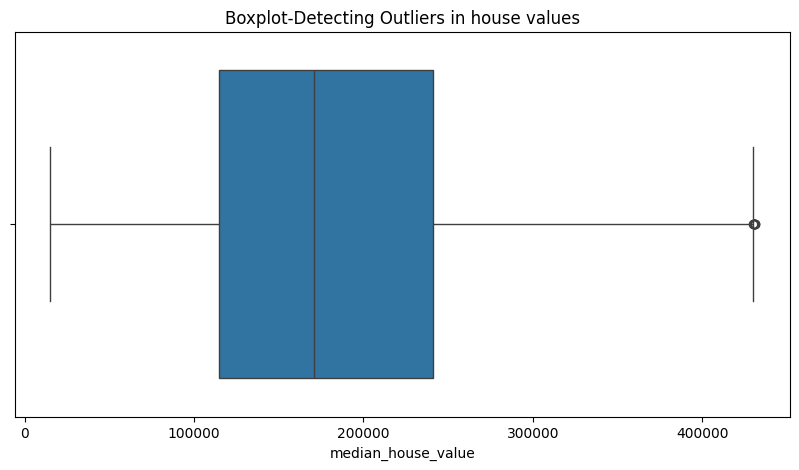

In [28]:
# using box plot
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='median_house_value')
plt.title("Boxplot-Detecting Outliers in house values")
plt.show()

##4. Feature Encoding

In [34]:
# change the non numerical data to numerical one
# using One-Hot Encoding for non-ordinal data
le= LabelEncoder()
df['ocean_proximity']= le.fit_transform(df['ocean_proximity'])
print(df)

       longitude  latitude  ...  median_house_value  ocean_proximity
1        -122.22     37.86  ...            358500.0                3
2        -122.24     37.85  ...            352100.0                3
3        -122.25     37.85  ...            341300.0                3
4        -122.25     37.85  ...            342200.0                3
5        -122.25     37.85  ...            269700.0                3
...          ...       ...  ...                 ...              ...
20635    -121.09     39.48  ...             78100.0                1
20636    -121.21     39.49  ...             77100.0                1
20637    -121.22     39.43  ...             92300.0                1
20638    -121.32     39.43  ...             84700.0                1
20639    -121.24     39.37  ...             89400.0                1

[19191 rows x 10 columns]


/tmp/ipython-input-2771700755.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ocean_proximity']= le.fit_transform(df['ocean_proximity'])


##5. Feature Scaling

In [38]:
scaler = StandardScaler()
df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity']]=scaler.fit_transform(df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity']])

print(pd.DataFrame(df))

       longitude  latitude  ...  median_house_value  ocean_proximity
1      -1.326952  1.020437  ...            1.943510         1.339147
2      -1.336923  1.015799  ...            1.871531         1.339147
3      -1.341909  1.015799  ...            1.750066         1.339147
4      -1.341909  1.015799  ...            1.760188         1.339147
5      -1.341909  1.015799  ...            0.944799         1.339147
...          ...       ...  ...                 ...              ...
20635  -0.763578  1.771841  ...           -1.210076        -0.100161
20636  -0.823406  1.776480  ...           -1.221323        -0.100161
20637  -0.828391  1.748650  ...           -1.050373        -0.100161
20638  -0.878247  1.748650  ...           -1.135848        -0.100161
20639  -0.838362  1.720820  ...           -1.082988        -0.100161

[19191 rows x 10 columns]


##6. handling skewed data

###1. detect skewness

In [43]:
# we do log transform as linear regression assume the normal distribution

skewed_fetures = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity']].skew().sort_values(ascending=False)
print(skewed_fetures)

population            4.961256
total_rooms           4.225275
total_bedrooms        3.482053
households            3.412299
ocean_proximity       1.075377
median_income         0.833015
median_house_value    0.619638
latitude              0.454674
housing_median_age    0.076722
longitude            -0.288866
dtype: float64


###2. Visualise Fetures

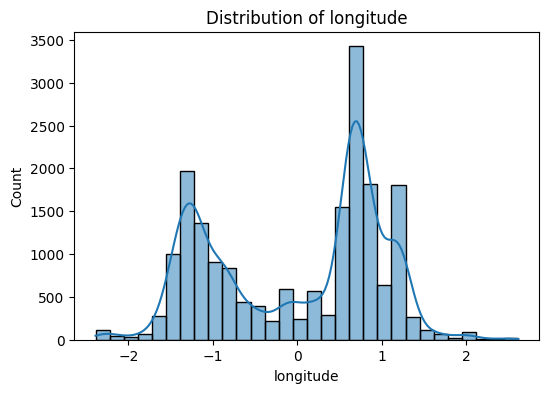

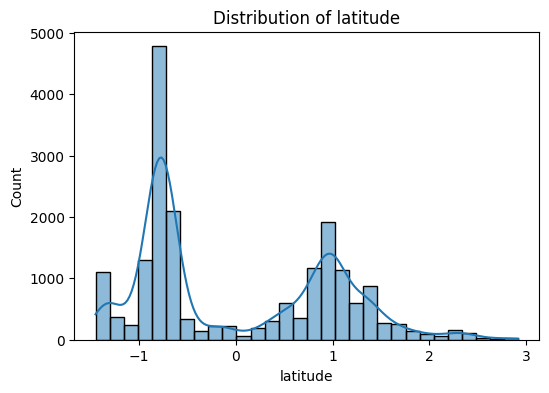

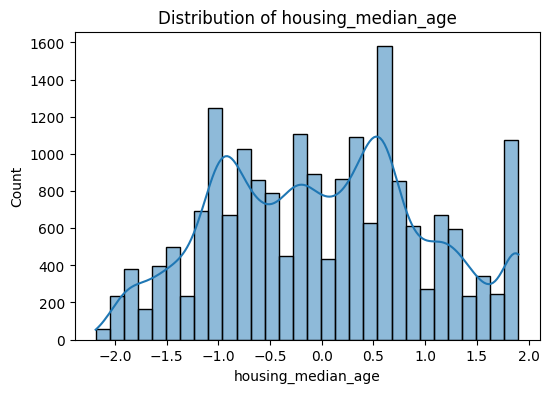

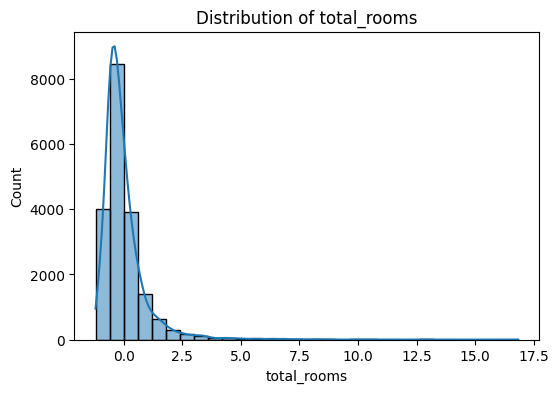

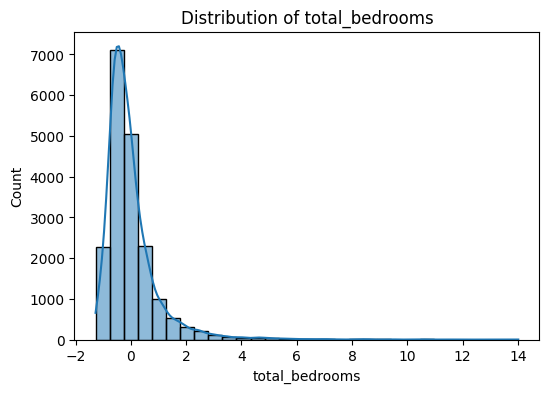

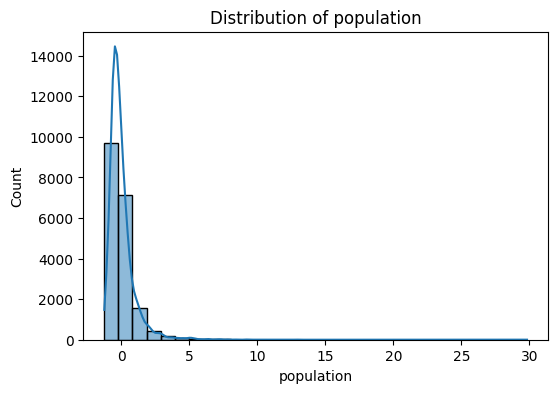

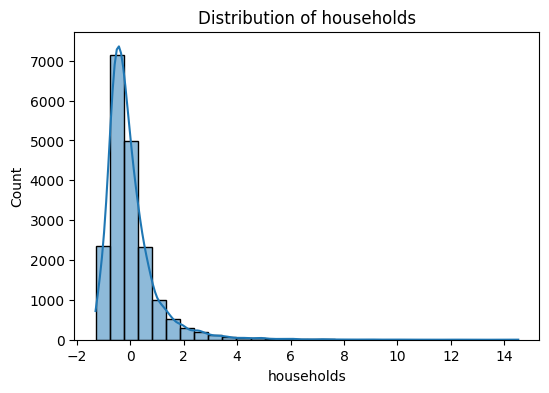

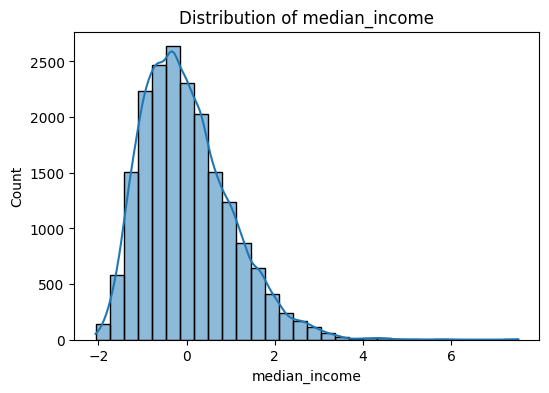

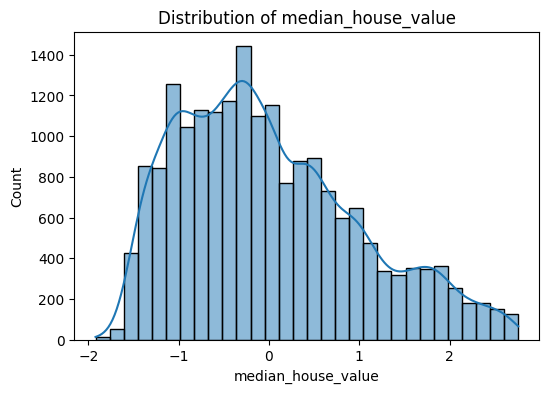

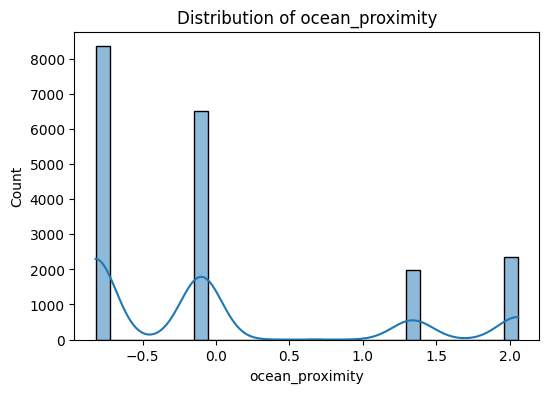

In [45]:
# visualise the skewed data
numeric_feture=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity']
for col in numeric_feature:

  plt.figure(figsize=(6,4))
  sns.histplot(df[col], kde=True, bins=30)
  plt.title(f"Distribution of {col}")
  plt.show()


###3. fix skewness

In [49]:
numeric_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity']
pt = PowerTransformer(method='yeo-johnson')
df[numeric_features] = pt.fit_transform(df[numeric_features])

print(pd.DataFrame(df))

       longitude  latitude  ...  median_house_value  ocean_proximity
1      -1.246720  1.054841  ...            1.657136         1.298463
2      -1.253486  1.052027  ...            1.613452         1.298463
3      -1.256865  1.052027  ...            1.538495         1.298463
4      -1.256865  1.052027  ...            1.544803         1.298463
5      -1.256865  1.052027  ...            0.993518         1.298463
...          ...       ...  ...                 ...              ...
20635  -0.840178  1.462165  ...           -1.399448         0.429200
20636  -0.885907  1.464430  ...           -1.416917         0.429200
20637  -0.889687  1.450803  ...           -1.156435         0.429200
20638  -0.927230  1.450803  ...           -1.285318         0.429200
20639  -0.897232  1.437081  ...           -1.205290         0.429200

[19191 rows x 10 columns]


##7.Feature Engineering

In [51]:
for col in ["total_rooms", "total_bedrooms", "population", "households"]:
    df[col] = np.log1p(df[col])


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [52]:
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [53]:
print(df)

       longitude  latitude  ...  median_house_value  ocean_proximity
1      -1.246720  1.054841  ...            1.657136         1.298463
2      -1.253486  1.052027  ...            1.613452         1.298463
3      -1.256865  1.052027  ...            1.538495         1.298463
4      -1.256865  1.052027  ...            1.544803         1.298463
5      -1.256865  1.052027  ...            0.993518         1.298463
...          ...       ...  ...                 ...              ...
20635  -0.840178  1.462165  ...           -1.399448         0.429200
20636  -0.885907  1.464430  ...           -1.416917         0.429200
20637  -0.889687  1.450803  ...           -1.156435         0.429200
20638  -0.927230  1.450803  ...           -1.285318         0.429200
20639  -0.897232  1.437081  ...           -1.205290         0.429200

[19191 rows x 10 columns]


##8. Train-test-split


In [58]:
# to evaluate model's performance fairly we do the train test split
# first we select the training and the testing data column

X = df.drop("median_house_value", axis=1) # features
y = df["median_house_value"]  # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(15352, 9) (15352,)
(3839, 9) (3839,)


##9. Model training


In [60]:
# to train model now
from sklearn.impute import SimpleImputer

# Impute missing values in the training data
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

model = LinearRegression()
model.fit(X_train_imputed, y_train)

LinearRegression()

##10. model evalution


In [65]:
# to access performance on unseen data check the mode performance

# Impute missing values in the test data using the imputer fitted on the training data
X_test_imputed = imputer.transform(X_test)

#predict on test set
y_pred= model.predict(X_test_imputed)

#calculate matrics
mse= mean_squared_error(y_test,y_pred)
mae= mean_absolute_error(y_test,y_pred)
rmse= np.sqrt(mse)
r2= r2_score(y_test,y_pred)
print(f"MAE:{mae:.2f},RMSE:{rmse:.2f},R2:{r2:.2f}")

MAE:0.49,RMSE:0.63,R2:0.61


##11. Cross-Validation (Robustness Check)


In [67]:
# why we do becuase it ensures that model gernalise well
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

# Create a pipeline with imputer and LinearRegression
pipeline = make_pipeline(SimpleImputer(strategy='mean'), LinearRegression())

# Perform cross-validation using the pipeline
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validated R²: {scores.mean():.2f} (±{scores.std():.2f})")

Cross-validated R²: 0.59 (±0.01)


##12.Feature Importance Analysis


In [68]:
# identify which feture derive prediction( find cofficient for linear regression)
# Get coefficients (for linear regression)
importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', ascending=False)

print(importance)

              Feature  Coefficient
7       median_income     0.577090
2  housing_median_age     0.094190
4      total_bedrooms     0.082919
6          households     0.050948
3         total_rooms     0.021697
5          population    -0.051797
8     ocean_proximity    -0.066854
0           longitude    -0.980111
1            latitude    -1.015810


##13.Hyperparameter Tuning

In [70]:
# to find the optimal model performance we do gridsearch cv

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

# Create a pipeline with imputer and ElasticNet
pipeline = make_pipeline(SimpleImputer(strategy='mean'), ElasticNet())

# Define parameters for GridSearchCV
params = {
    'elasticnet__alpha': [0.1, 1, 10],      # Regularization strength
    'elasticnet__l1_ratio': [0.2, 0.5, 0.8]  # Mix of L1/L2 regularization
}
grid = GridSearchCV(pipeline, params, cv=5, scoring='r2')
grid.fit(X_train, y_train)

print(f"Best R²: {grid.best_score_:.2f}")
print(f"Best params: {grid.best_params_}")

Best R²: 0.53
Best params: {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.2}
